In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
pd.options.display.float_format = "{:,.2f}".format

from joblib import dump,load

In [18]:
df = pd.read_csv("../Capstone_project/BOD_train.csv")

In [19]:
df.shape

(147, 9)

In [20]:
df.head()

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN


In [21]:
df.describe(include = 'all')

,Id,target,1,2,3,4,5,6,7
count,147.00,147.00,145.00,145.00,32.00,31.00,33.00,37.00,37.00
mean,101.40,5.02,4.97,4.91,4.67,5.87,8.68,3.88,3.96
std,64.84,2.12,2.04,2.00,2.06,2.56,5.30,1.62,1.92
min,0.00,1.30,0.90,1.04,2.04,2.48,2.88,1.00,1.60
25%,41.50,3.72,3.50,3.40,3.33,4.45,5.84,2.90,2.90
50%,102.00,4.60,4.80,4.83,4.15,5.50,7.30,3.40,3.50
75%,158.50,6.28,6.45,6.20,5.97,6.40,8.42,4.80,4.40
max,214.00,11.70,10.90,11.00,10.66,14.79,27.12,8.54,10.37


## Missing value

In [22]:
df.isna().mean()*100

Id        0.00
target    0.00
1         1.36
2         1.36
3        78.23
4        78.91
5        77.55
6        74.83
7        74.83
dtype: float64

<AxesSubplot:xlabel='features', ylabel='number of miising obs'>

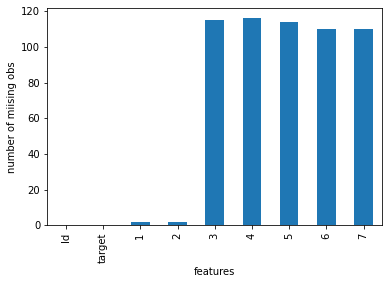

In [23]:
df.isna().sum().plot(kind='bar', xlabel='features', ylabel='number of miising obs')

## filling missing value

In [24]:
df['3'].fillna(df['3'].mean(), inplace=True)
df['4'].fillna(df['4'].mean(), inplace=True)
df['5'].fillna(df['5'].mean(), inplace=True)
df['6'].fillna(df['6'].mean(), inplace=True)
df['7'].fillna(df['7'].mean(), inplace=True)

In [25]:
df.isna().sum()

Id        0
target    0
1         2
2         2
3         0
4         0
5         0
6         0
7         0
dtype: int64

In [26]:
df.dropna(how = 'any', inplace=True)

In [27]:
df.isna().sum()

Id        0
target    0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
dtype: int64

In [28]:
df

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,4.67,5.87,8.68,3.88,3.96
1,3,4.28,5.88,6.84,4.67,5.87,8.68,3.88,3.96
2,4,3.97,3.20,2.70,4.67,5.87,8.68,3.88,3.96
3,5,5.95,7.70,7.06,4.67,5.87,8.68,3.88,3.96
4,6,4.70,5.50,5.30,4.67,5.87,8.68,3.88,3.96
...,...,...,...,...,...,...,...,...,...
142,208,2.20,5.00,5.80,4.67,5.87,8.68,3.88,3.96
143,211,5.60,8.00,8.00,4.67,5.87,8.68,3.88,3.96
144,212,6.00,6.80,7.20,4.67,5.87,8.68,3.88,3.96
145,213,8.00,5.20,7.80,4.67,5.87,8.68,3.88,3.96


## converting target in to categorical variable

In [29]:
df['target'] = np.where(df['target']>6.5,1,0)

In [30]:
df

,Id,target,1,2,3,4,5,6,7
0,0,0,4.80,5.85,4.67,5.87,8.68,3.88,3.96
1,3,0,5.88,6.84,4.67,5.87,8.68,3.88,3.96
2,4,0,3.20,2.70,4.67,5.87,8.68,3.88,3.96
3,5,0,7.70,7.06,4.67,5.87,8.68,3.88,3.96
4,6,0,5.50,5.30,4.67,5.87,8.68,3.88,3.96
...,...,...,...,...,...,...,...,...,...
142,208,0,5.00,5.80,4.67,5.87,8.68,3.88,3.96
143,211,0,8.00,8.00,4.67,5.87,8.68,3.88,3.96
144,212,0,6.80,7.20,4.67,5.87,8.68,3.88,3.96
145,213,1,5.20,7.80,4.67,5.87,8.68,3.88,3.96


In [31]:
df['target'].value_counts()/len(df)*100

0   77.78
1   22.22
Name: target, dtype: float64

## setting index

In [32]:
df.set_index('Id', inplace=True)

In [33]:
df

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,0,4.80,5.85,4.67,5.87,8.68,3.88,3.96
3,0,5.88,6.84,4.67,5.87,8.68,3.88,3.96
4,0,3.20,2.70,4.67,5.87,8.68,3.88,3.96
5,0,7.70,7.06,4.67,5.87,8.68,3.88,3.96
6,0,5.50,5.30,4.67,5.87,8.68,3.88,3.96
...,...,...,...,...,...,...,...,...
208,0,5.00,5.80,4.67,5.87,8.68,3.88,3.96
211,0,8.00,8.00,4.67,5.87,8.68,3.88,3.96
212,0,6.80,7.20,4.67,5.87,8.68,3.88,3.96


## outlier analysis

In [34]:
input_cols = ['1','2','3','4','5','6','7']

In [35]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.025)
df['Anomaly_Score'] = model_ee.fit_predict(df[input_cols])

df = df[df['Anomaly_Score']==1]

In [36]:
del df['Anomaly_Score']

In [37]:
dump(model_ee, "../model_objects/BOD_outlier.joblib")

['../model_objects/BOD_outlier.joblib']

In [38]:
df

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,0,4.80,5.85,4.67,5.87,8.68,3.88,3.96
3,0,5.88,6.84,4.67,5.87,8.68,3.88,3.96
4,0,3.20,2.70,4.67,5.87,8.68,3.88,3.96
5,0,7.70,7.06,4.67,5.87,8.68,3.88,3.96
6,0,5.50,5.30,4.67,5.87,8.68,3.88,3.96
...,...,...,...,...,...,...,...,...
208,0,5.00,5.80,4.67,5.87,8.68,3.88,3.96
211,0,8.00,8.00,4.67,5.87,8.68,3.88,3.96
212,0,6.80,7.20,4.67,5.87,8.68,3.88,3.96


## Standard Scaler

In [39]:
sc = StandardScaler()
sc.fit(df[input_cols])

StandardScaler()

In [40]:
dump(sc, "../model_objects/BOD_standard.joblib")

['../model_objects/BOD_standard.joblib']

In [41]:
sc_df = pd.DataFrame(sc.transform(df[input_cols]),columns=input_cols,index=df.index)
sc_df

,1,2,3,4,5,6,7
Id,,,,,,,
0,-0.08,0.49,0.07,0.16,0.19,0.03,0.08
3,0.44,1.00,0.07,0.16,0.19,0.03,0.08
4,-0.85,-1.13,0.07,0.16,0.19,0.03,0.08
5,1.32,1.12,0.07,0.16,0.19,0.03,0.08
6,0.25,0.21,0.07,0.16,0.19,0.03,0.08
...,...,...,...,...,...,...,...
208,0.01,0.47,0.07,0.16,0.19,0.03,0.08
211,1.46,1.60,0.07,0.16,0.19,0.03,0.08
212,0.88,1.19,0.07,0.16,0.19,0.03,0.08


In [42]:
df.drop(columns = input_cols, inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_14708\1221983717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = input_cols, inplace=True)


,target
Id,
0,0
3,0
4,0
5,0
6,0
...,...
208,0
211,0
212,0


In [43]:
df = pd.concat([df,sc_df], axis=1)
df

,target,1,2,3,4,5,6,7
Id,,,,,,,,
0,0,-0.08,0.49,0.07,0.16,0.19,0.03,0.08
3,0,0.44,1.00,0.07,0.16,0.19,0.03,0.08
4,0,-0.85,-1.13,0.07,0.16,0.19,0.03,0.08
5,0,1.32,1.12,0.07,0.16,0.19,0.03,0.08
6,0,0.25,0.21,0.07,0.16,0.19,0.03,0.08
...,...,...,...,...,...,...,...,...
208,0,0.01,0.47,0.07,0.16,0.19,0.03,0.08
211,0,1.46,1.60,0.07,0.16,0.19,0.03,0.08
212,0,0.88,1.19,0.07,0.16,0.19,0.03,0.08


## splitting

In [44]:
x= df.drop(columns = ['target'])
y= df['target']

## train test split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=25, stratify=y)

In [46]:
x_train.shape, y_train.shape

((112, 7), (112,))

In [47]:
x_test.shape, y_test.shape

((28, 7), (28,))

## training models

In [48]:
from sklearn import metrics
metric_df = pd.DataFrame(columns = ['model','accuracy', 'precision','recall','f1_score'])

In [49]:
metric_df

,model,accuracy,precision,recall,f1_score


### 1) naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1_score: ',metrics.f1_score(y_test,y_pred))

metrics.plot_confusion_matrix(nb,x_test,y_test)

In [51]:
metric_df.loc[len(metric_df)] = (['Naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27


### 2) KNN

accuracy:  0.75
precision:  0.42857142857142855
recall:  0.5
f1_score:  0.4615384615384615


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


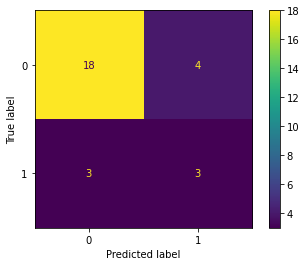

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1_score: ',metrics.f1_score(y_test,y_pred))

metrics.plot_confusion_matrix(knn,x_test,y_test)

In [53]:
metric_df.loc[len(metric_df)] = (['KNN', metrics.accuracy_score(y_test,y_pred), metrics.precision_score(y_test,y_pred), 
                                  metrics.recall_score(y_test,y_pred), metrics.f1_score(y_test, y_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46


### 3) SVC

accuracy:  0.75
precision:  0.3333333333333333
recall:  0.16666666666666666
f1_score:  0.2222222222222222


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


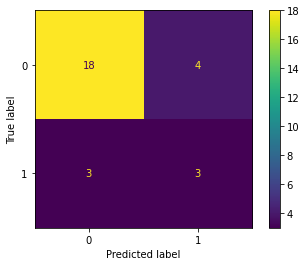

In [54]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1_score: ',metrics.f1_score(y_test,y_pred))

metrics.plot_confusion_matrix(knn,x_test,y_test)

In [55]:
metric_df.loc[len(metric_df)] = (['SVC', metrics.accuracy_score(y_test,y_pred), metrics.precision_score(y_test,y_pred), 
                                  metrics.recall_score(y_test,y_pred), metrics.f1_score(y_test, y_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22


### 4) random forest

accuracy:  0.75
precision:  0.4444444444444444
recall:  0.6666666666666666
f1_score:  0.5333333333333333


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


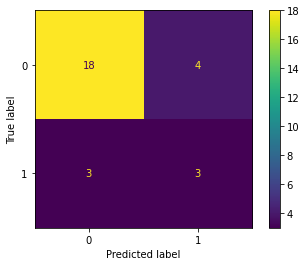

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1_score: ',metrics.f1_score(y_test,y_pred))

metrics.plot_confusion_matrix(knn,x_test,y_test)

In [57]:
metric_df.loc[len(metric_df)] = (['RF',metrics.accuracy_score(y_test,y_pred), metrics.precision_score(y_test,y_pred), 
                                  metrics.recall_score(y_test,y_pred), metrics.f1_score(y_test, y_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53


## Hyperparameter tuning

### i) Naive bayes

In [58]:
from sklearn.model_selection import GridSearchCV
grid_params = {'var_smoothing' : [1/(10**x) for x in range(0,16)]}

nb_gs = GridSearchCV(GaussianNB(), grid_params, verbose=1, n_jobs=-1,scoring= 'f1', cv=3)
nb_gs.fit(x_train,y_train)
nb_gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'var_smoothing': 0.1}

accuracy:  0.6071428571428571
precision:  0.2222222222222222
recall:  0.3333333333333333
f1_score:  0.26666666666666666


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


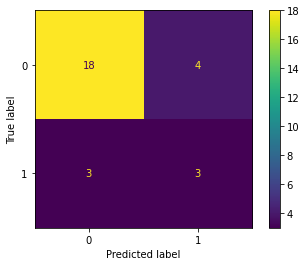

In [59]:
nb_gs = GaussianNB(var_smoothing = 0.01)
nb_gs.fit(x_train, y_train)
nb_gs_pred = nb_gs.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,nb_gs_pred))
print('precision: ',metrics.precision_score(y_test,nb_gs_pred))
print('recall: ',metrics.recall_score(y_test,nb_gs_pred))
print('f1_score: ',metrics.f1_score(y_test,nb_gs_pred))

metrics.plot_confusion_matrix(knn,x_test,y_test)

In [61]:
metric_df.loc[len(metric_df)] = (['naive bayes opt',metrics.accuracy_score(y_test,nb_gs_pred), metrics.precision_score(y_test,nb_gs_pred), 
                                  metrics.recall_score(y_test,nb_gs_pred), metrics.f1_score(y_test, nb_gs_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27


### KNN

In [46]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
knn_gs.fit(x_train, y_train)
knn_gs.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Accuracy :  0.7142857142857143
Precision :  0.375
Recall :  0.5
f1_Score :  0.42857142857142855


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


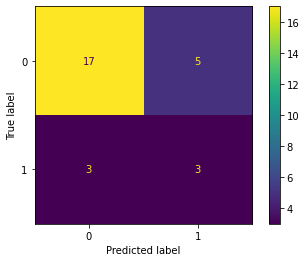

In [63]:
knn_gs = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 7, weights= 'uniform')
knn_gs.fit(x_train,y_train)
knn_gs_pred = knn_gs.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test,knn_gs_pred))
print("Precision : ",metrics.precision_score(y_test,knn_gs_pred))
print("Recall : ",metrics.recall_score(y_test,knn_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,knn_gs_pred))
metrics.plot_confusion_matrix(knn_gs,x_test,y_test)

In [64]:
metric_df.loc[len(metric_df)] = (['knn opt',metrics.accuracy_score(y_test,knn_gs_pred), metrics.precision_score(y_test,knn_gs_pred), 
                                  metrics.recall_score(y_test,knn_gs_pred), metrics.f1_score(y_test, knn_gs_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27
6,knn opt,0.71,0.38,0.50,0.43


### SVC opt

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'C':[1,2,5,10],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[1,2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001]}

svm_gs = GridSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
svm_gs.fit(x_train, y_train)
svm_gs.best_params_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

Accuracy :  0.6785714285714286
Precision :  0.2857142857142857
Recall :  0.3333333333333333
f1_Score :  0.30769230769230765


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


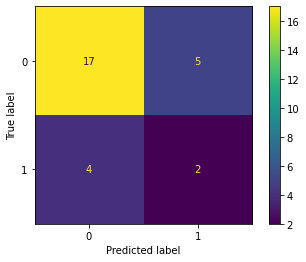

In [66]:
svm_gs = SVC(kernel= 'poly', gamma= 0.1, degree= 1, C= 5)
svm_gs.fit(x_train,y_train)
y_gs_pred = svm_gs.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(svm_gs,x_test,y_test)

In [67]:
metric_df.loc[len(metric_df)] = (['SVC opt',metrics.accuracy_score(y_test,y_gs_pred), metrics.precision_score(y_test,y_gs_pred), 
                                  metrics.recall_score(y_test,y_gs_pred), metrics.f1_score(y_test, y_gs_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27
6,knn opt,0.71,0.38,0.50,0.43
7,SVC opt,0.68,0.29,0.33,0.31


### RF

In [53]:
from sklearn.model_selection import GridSearchCV

""""grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state':[42]}

rf_gs = GridSearchCV(RandomForestClassifier(), grid_params, verbose=3, n_jobs=-1, scoring = 'f1', cv=3)
rf_gs.fit(x_train, y_train)
rf_gs.best_params_"""

'"grid_params = {\'n_estimators\': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],\n               \'max_features\': [\'auto\', \'sqrt\'],\n               \'max_depth\': [int(x) for x in np.linspace(10, 110, num = 11)],\n               \'min_samples_split\':  [2, 5, 10],\n               \'min_samples_leaf\': [1, 2, 4],\n               \'bootstrap\': [True, False],\n               \'random_state\':[42]}\n\nrf_gs = GridSearchCV(RandomForestClassifier(), grid_params, verbose=3, n_jobs=-1, scoring = \'f1\', cv=3)\nrf_gs.fit(x_train, y_train)\nrf_gs.best_params_'

Accuracy :  0.8214285714285714
Precision :  0.5714285714285714
Recall :  0.6666666666666666
f1 score :  0.6153846153846153


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


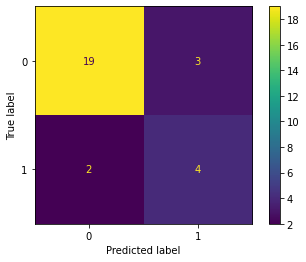

In [68]:
rf_gs = RandomForestClassifier(n_estimators = 1000 , max_features='auto' , max_depth=10 , min_samples_split=10 ,
                               min_samples_leaf=1 ,bootstrap=True ,
                               random_state=42)
rf_gs.fit(x_train,y_train)
rf_gs_pred = rf_gs.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test,rf_gs_pred))
print("Precision : ",metrics.precision_score(y_test,rf_gs_pred))
print("Recall : ",metrics.recall_score(y_test,rf_gs_pred))
print("f1 score : ",metrics.f1_score(y_test,rf_gs_pred))

metrics.plot_confusion_matrix(rf_gs,x_test,y_test)

In [69]:
metric_df.loc[len(metric_df)] = (['RF opt',metrics.accuracy_score(y_test,rf_gs_pred), metrics.precision_score(y_test,rf_gs_pred), 
                                  metrics.recall_score(y_test,rf_gs_pred), metrics.f1_score(y_test,rf_gs_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27
6,knn opt,0.71,0.38,0.50,0.43
7,SVC opt,0.68,0.29,0.33,0.31
8,RF opt,0.82,0.57,0.67,0.62


### 5) XGBOOST

In [72]:
df["target"].value_counts()

0    108
1     32
Name: target, dtype: int64

In [73]:
spw = df["target"].value_counts()[0]/df["target"].value_counts()[1]
spw

3.375

In [58]:
#!pip install xgboost

In [74]:
import xgboost
from xgboost import XGBClassifier

accuracy:  0.7142857142857143
precision:  0.4
recall:  0.6666666666666666
f1_score:  0.5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


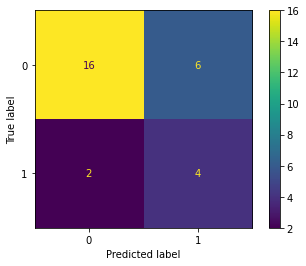

In [75]:
xgb = XGBClassifier(random_state = 25, scale_pos_weight=spw)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('precision: ',metrics.precision_score(y_test, y_pred))
print('recall: ',metrics.recall_score(y_test, y_pred))
print('f1_score: ',metrics.f1_score(y_test, y_pred))

metrics.plot_confusion_matrix(xgb,x_test, y_test)

In [76]:
metric_df.loc[len(metric_df)] = (['XGB',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),
                            metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27
6,knn opt,0.71,0.38,0.50,0.43
7,SVC opt,0.68,0.29,0.33,0.31
8,RF opt,0.82,0.57,0.67,0.62
9,XGB,0.71,0.40,0.67,0.50


### hyper parameter tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depth":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs = RandomizedSearchCV(XGBClassifier(), grid_params, verbose=3, n_jobs=-1, scoring='f1',cv=3)
xgb_gs.fit(x_train, y_train)
xgb_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'subsample': 0.85,
 'scale_pos_weight': 3.375,
 'random_state': 42,
 'n_estimators': 300,
 'min_child_weight': 7,
 'max_depth': 4,
 'gamma': 0.5,
 'eta': 0.5,
 'colsample_bytree': 0.8}

accuracy:  0.7142857142857143
precision:  0.4
recall:  0.6666666666666666
f1_score:  0.5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


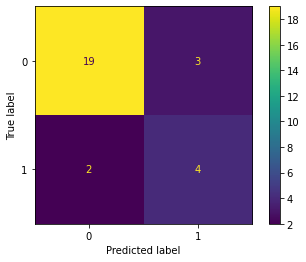

In [78]:
xgb_gs = XGBClassifier(subsample= 0.7,
 scale_pos_weight= 3.375,
 random_state= 42,
 n_estimators= 425,
 min_child_weight= 6,
 max_depth= 10,
 gamma= 0.3,
 eta= 0.25,
 colsample_bytree=0.55)

xgb_gs.fit(x_train, y_train)
y_gs_pred = xgb.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test, y_gs_pred))
print('precision: ',metrics.precision_score(y_test, y_gs_pred))
print('recall: ',metrics.recall_score(y_test, y_gs_pred))
print('f1_score: ',metrics.f1_score(y_test,y_gs_pred))

metrics.plot_confusion_matrix(xgb_gs,x_test, y_test)

In [79]:
metric_df.loc[len(metric_df)] = (['XGB_opt',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred),
                            metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.61,0.22,0.33,0.27
1,KNN,0.75,0.43,0.50,0.46
2,SVC,0.75,0.33,0.17,0.22
3,RF,0.75,0.44,0.67,0.53
4,naive bayes opt,0.75,0.44,0.67,0.53
5,naive bayes opt,0.61,0.22,0.33,0.27
6,knn opt,0.71,0.38,0.50,0.43
7,SVC opt,0.68,0.29,0.33,0.31
8,RF opt,0.82,0.57,0.67,0.62
9,XGB,0.71,0.40,0.67,0.50


In [80]:
dump(rf_gs,"../model_objects/BOD_best_model.joblib")

['../model_objects/BOD_best_model.joblib']